In [ ]:
import pandas as pd
import os
import sklearn as sk
from sklearn.datasets import load_wine
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tmp_1 = load_wine()

tmp_2 = pd.DataFrame(tmp_1['data'],
                     columns=tmp_1['feature_names'])

tmp_2['target_name'] = pd.Series(tmp_1['target'], name='target_values')

tmp_2.groupby(['target_name']).count()

tmp_2 = tmp_2.sort_values(by = ['target_name'])

tmp_2 = tmp_2.reset_index(drop = True)

tmp_2['target_name'].value_counts()

tmp_2.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target_name'],
      dtype='object')

In [ ]:
X = tmp_2[['magnesium','flavanoids']]

y = tmp_2['target_name']

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [59 71 48]
Labels counts in y_train: [41 50 33]
Labels counts in y_test: [18 21 15]


In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


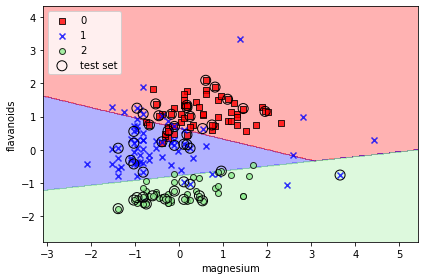

In [ ]:
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('magnesium')
plt.ylabel('flavanoids')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


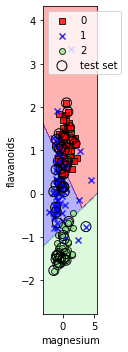

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


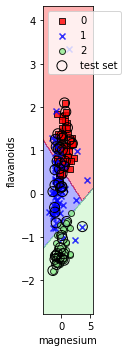

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


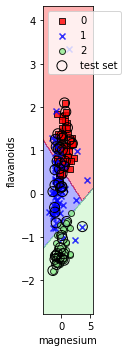

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


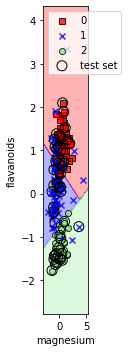

In [ ]:
for subplot, C in ((141, 1), (142,5), (143, 10), (144, 100)):
  svm = SVC(kernel='linear', C = C, random_state=1)
  svm.fit(X_train_std, y_train)
  plt.figure(figsize=(5, 5))
  plt.subplot(subplot)
  plot_decision_regions(X_combined_std,
                        y_combined,
                        classifier=svm,
                        test_idx=range(105, 150))
  plt.xlabel('magnesium')
  plt.ylabel('flavanoids')
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show(subplot)

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


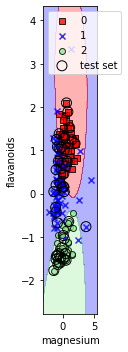

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


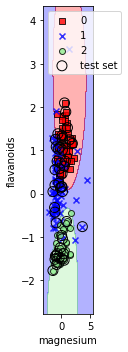

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


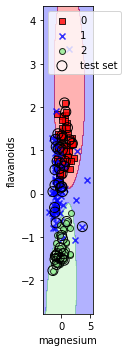

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


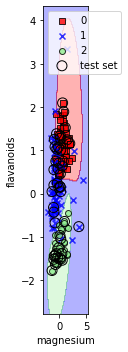

In [ ]:
for subplot, Gm, C in ((141, 0.1, 1), (142, 0.1, 5), (143, 0.1, 10), (144, 0.10, 100)):
  svm = SVC(kernel='rbf', gamma = Gm, C=C, random_state=1)
  svm.fit(X_train_std, y_train)
  plt.figure(figsize=(5, 5))
  plt.subplot(subplot)
  plot_decision_regions(X_combined_std,
                        y_combined,
                        classifier=svm,
                        test_idx=range(105, 150))
  plt.xlabel('magnesium')
  plt.ylabel('flavanoids')
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()


<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


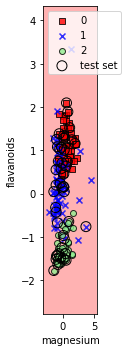

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


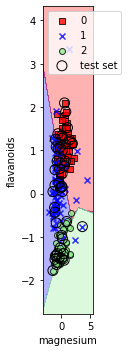

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


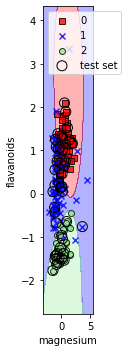

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


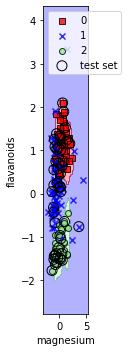

In [ ]:
for subplot, Gm, C in ((141, 0.001, 1), (142, 0.01, 1), (143, 0.1, 1), (144, 10, 1)):
  svm = SVC(kernel='rbf', gamma = Gm, C=C, random_state=1)
  svm.fit(X_train_std, y_train)
  plt.figure(figsize=(5, 5))
  plt.subplot(subplot)
  plot_decision_regions(X_combined_std,
                        y_combined,
                        classifier=svm,
                        test_idx=range(105, 150))
  plt.xlabel('magnesium')
  plt.ylabel('flavanoids')
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()


<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


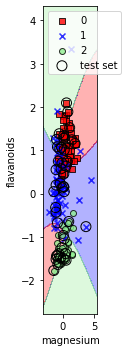

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


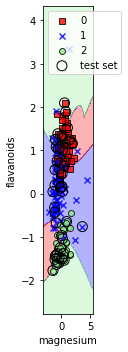

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


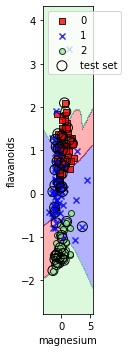

<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


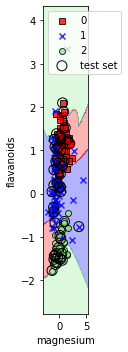

In [ ]:
for subplot, Dg, C in ((141, 2, 1), (142, 2, 5), (143, 2, 10), (144, 2, 100)):
  svm = SVC(kernel='poly',degree = Dg, C = C, random_state=1)
  svm.fit(X_train_std, y_train)
  plt.figure(figsize=(5, 5))
  plt.subplot(subplot)
  plot_decision_regions(X_combined_std,
                        y_combined,
                        classifier=svm,
                        test_idx=range(105, 150))
  plt.xlabel('magnesium')
  plt.ylabel('flavanoids')
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

In [ ]:
for subplot, Dg, C in ((141, 2, 1), (142, 3, 1), (143, 5, 1), (144, 10, 1)):
  svm = SVC(kernel='poly',degree = Dg, C = C, random_state=1)
  svm.fit(X_train_std, y_train)
  plt.figure(figsize=(5, 5))
  plt.subplot(subplot)
  plot_decision_regions(X_combined_std,
                        y_combined,
                        classifier=svm,
                        test_idx=range(105, 150))
  plt.xlabel('magnesium')
  plt.ylabel('flavanoids')
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()
